<a href="https://colab.research.google.com/github/eduardodacostasoares/Data_Science/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Transformando Variáveis**#

##**Bibliotecas**##

**1) Numpy**: biblioteca de álgebra linear do Python

**2) Pandas**: biblioteca de manipulação de Dataframes

**3) Pyplot**: biblioteca de visualização de dados

**4) Seaborn**: outra biblioteca de visualização de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #particionamento da base de dados em DADOS DE TREINO e DADOS DE TESTE
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None,precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

##**Base de dados do Titanic**##
   - Encontrada no Kaggle
   

###DESCRIÇÃO DOS ATRIBUTOS###
- **survival** = Sobrevivente (0=Não; 1=Sim)
- **pclass**   = Classe do passageiro (1 = 1ª Classe; 2 = 2ª Classe; 3 = 3ª Classe)
- **name** = Nome(str)
- **age** = idade(int)
- **sex** = Sexo (M; F)
- **sibsp** = número de irmãos/cônjuges a bordo
- **parch** = número de pais e filhos
- **ticket** = número do bilhete
- **fare** = tarifa do passageiro
- **cabin** = cabine
- **embarked** = embarque (C = Cherbourg; Q = Queenstown; S = Southampton).



###**Upload de arquivos**###

In [2]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
titanic_train = pd.read_csv(next(iter(uploaded.keys())))

print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))
print('\nCampos de Titanic:\n{0}\n'.format(list(titanic_train.keys())))
print("\nTipos de dados:\n{0}\n".format(titanic_train.dtypes))


Dimensões de Titanic:
(891, 12)


Campos de Titanic:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Tipos de dados:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



##**ESTATÍSTICA DESCRITIVA DOS DADOS**##

O comando **describe** exibe prioritariamente os campos numéricos. Deve-se isolar os campos categóricos para serem exibidos posteriormente.

In [4]:
# Exibe apenas os campos numéricos:

print(titanic_train.describe())

# Para se ter uma visão dos atributos categórios, os atributos numéricos são
# descartados.

categ = titanic_train.dtypes[titanic_train.dtypes == "object"].index

print("\n", titanic_train[categ].describe(), sep='\n')

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


                                                Name   Sex  Ticket Cabin  \
count                                            891   891     891   204   
unique                                           891     2     681   147   
top     Jerwan, Mrs. Amin S (Marie Marthe Thuillard)  male  347082    G6   
freq                                               1   577       7     4 

##**REMOÇÃO DE ATRIBUTOS IRRELEVANTES**##

Os atributos **survival** (objetivo ou label), e atributos que descrevem os passageiros ou os agrupam em categorias são úteis e serão mantidos, por exemplo: **Pclass**, **Sex**, **Age**, **SibSp**, **Parch**, **Fare** e **Embarked**.



*   **passengerId** é apenas uma chave primária para identificar um passageiro, e não é relevante para o problema.
*   **Name** não é útil para a previsão, mas pode ser útil para a identificação dos registros ou pós-processamento (por exemplo, extrair o último nome).
*   **Ticket** não identifica o registro e nem descreve o passageiro, por isso, deve ser removido.
*   **Cabin** não identifica bem os passageiros, mas, pode ser útil utilizarmos o padrão "Letra + número", para descrever os passageiros pelo andar do local da cabine.  

In [5]:
del titanic_train["PassengerId"]
del titanic_train["Ticket"]

# o número de atributos foi reduzido para 10

print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))


Dimensões de Titanic:
(891, 10)



##**TRANSFORMAÇÕES DE DADOS**##

**Converter numérico em categórico**.

Variáveis categóricas codificadas numericamente possuem baixa legibilidade. Portanto, podem ser candidatas a serem recodificadas.

In [6]:
new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Morreu", "Sobreviveu"])
titanic_train["Survived"] = new_survived

new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)
new_Pclass = new_Pclass.rename_categories(["1a Classe","2a Classe","3a Classe"])
titanic_train["Pclass"] = new_Pclass

print("\nTipos dos dados:\n{0}\n".format(titanic_train.dtypes))
categ = titanic_train.dtypes[titanic_train.dtypes == "category"].index
print("\n", titanic_train[categ].describe(), sep='\n')


Tipos dos dados:
Survived    category
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
dtype: object



       Survived     Pclass
count       891        891
unique        2          3
top      Morreu  3a Classe
freq        549        491


##**Convertendo atributos através do processamento de *strings*. (Usando *list comprehension*)**

No atributo *Cabin*, parece que o padrão "Letra + Número" indica que a cabine pertence a algum andar, ou nível. Podemos agrupar o atributo *Cabin* pela letra inicial da *Cabin*. Podemos agrupar o atributo *Cabin* pela letra inicial da cabine.

In [7]:
# Exibe os valores
print("\nValores únicos do atributo Cabin:", titanic_train["Cabin"].unique(), sep='\n')

#Converte o dado para String
char_cabin = titanic_train["Cabin"].astype(str)

#Pega apenas a primeira letra
new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin]) #list comprehension
titanic_train["Cabin"] = new_cabin

print("\nValores únicos do atributo Cabin:", titanic_train["Cabin"].unique(), sep='\n')



Valores únicos do atributo Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

Valores

##**TRATANDO VALORES OMISSOS OU INCONSISTENTES**##

Em atributos numéricos, as possibilidades são:



**1.**   substituir por zeros;

**2.**   substituir por um valor médio ou mediano;

**3.**   estimar valores usando métodos estatísticos ou preditivos;

**4.**   particionar a base em: registros completos e registros incompletos.

****
Abaixo será analisado o atributo **Age** para tratar os valores omissos.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1505b96ed0>]],
      dtype=object)

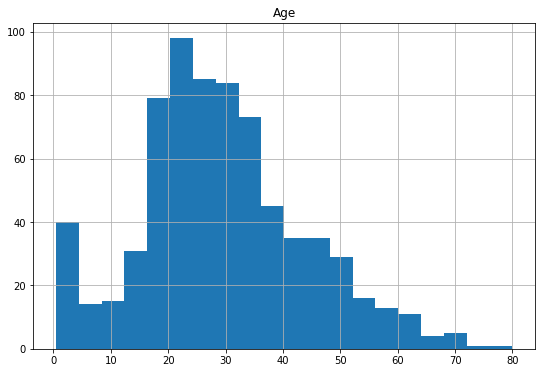

In [8]:
titanic_train.hist(column='Age',  # coluna a ser plotada
                   figsize=(9,6), # tamanho do gráfico
                   bins=20)       # número de colunas do histograma

O dado da coluna **Age** possui uma distribuição próxima da **Distribuição Normal** (ou **Gaussiana**)


Análise do novo atributo Age:
count    891.00
mean      29.36
std       13.02
min        0.42
25%       22.00
50%       28.00
75%       35.00
max       80.00
Name: Age, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1505aae950>]],
      dtype=object)

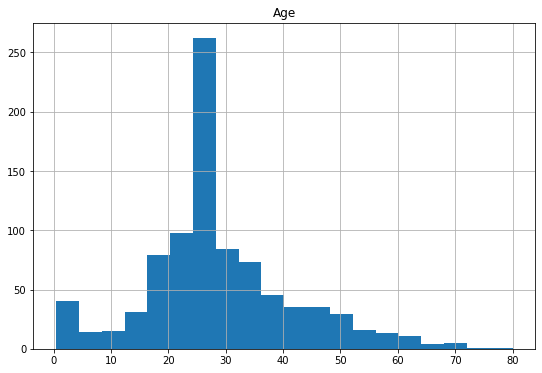

In [9]:
mediana = np.median([el for el in titanic_train["Age"] if (np.isnan(el) == False)])

new_age = np.where(titanic_train["Age"].isnull(), # condição ("Onde o valor de 'AGE' for "NULL")
                   mediana,                     # Valor a ser substituído, se a condição for VERDADEIRA
                   titanic_train["Age"])        # Valor a ser substituído, se a condição for FALSA

titanic_train["Age"] = new_age

print("\nAnálise do novo atributo Age:")
print(titanic_train["Age"].describe())

titanic_train.hist(column='Age',  # coluna a ser plotada
                   figsize=(9,6), # tamanho do gráfico
                   bins=20)       # número de colunas do histograma

###**DETECTANDO OUTLIERS**###

*Outliers* são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de *Outliers*, com valores máximo e mínimo muito distantes; o valor da média muito próximo de um máximo ou de um mínimo, mostrando um problema de distribuição de dados.

Registro com valores extremos:
       Survived     Pclass                                Name     Sex   Age  \
258  Sobreviveu  1a Classe                    Ward, Miss. Anna  female  35.0   
679  Sobreviveu  1a Classe  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737  Sobreviveu  1a Classe              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Fare Cabin Embarked  
258      0      0  512.33     n        C  
679      0      1  512.33     B        C  
737      0      0  512.33     B        C  


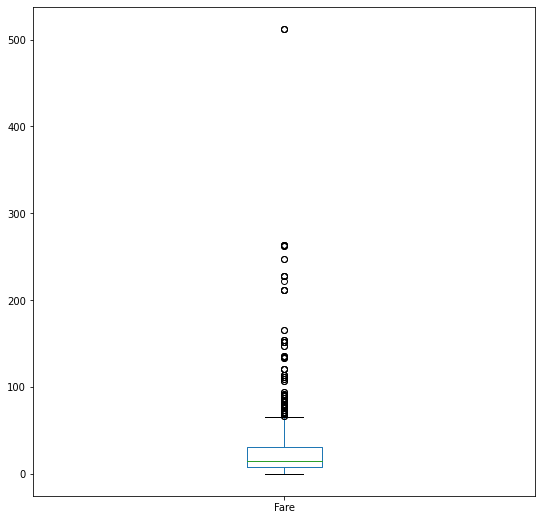

In [11]:
titanic_train["Fare"].plot(kind="box", figsize =(9,9))

index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]))

print("Registro com valores extremos:", titanic_train.loc[index], sep='\n')

###**CRIANDO NOVOS ATRIBUTOS**###

Vai ser criada uma nova variável (***Family***), que irá reunir cônjuge e irmãos (***SibSp***) com pais e filhos (***Parch***). 

In [13]:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

# Encontrando quem tem a maior família a bordo

most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))

print("\nAs maiores famílias à bordo:\n\n{0}".format(titanic_train.loc[most_family]))


As maiores famílias à bordo:

    Survived     Pclass                               Name     Sex   Age  \
159   Morreu  3a Classe         Sage, Master. Thomas Henry    male  28.0   
180   Morreu  3a Classe       Sage, Miss. Constance Gladys  female  28.0   
201   Morreu  3a Classe                Sage, Mr. Frederick    male  28.0   
324   Morreu  3a Classe           Sage, Mr. George John Jr    male  28.0   
792   Morreu  3a Classe            Sage, Miss. Stella Anna  female  28.0   
846   Morreu  3a Classe           Sage, Mr. Douglas Bullen    male  28.0   
863   Morreu  3a Classe  Sage, Miss. Dorothy Edith "Dolly"  female  28.0   

     SibSp  Parch   Fare Cabin Embarked  Family  
159      8      2  69.55     n        S      10  
180      8      2  69.55     n        S      10  
201      8      2  69.55     n        S      10  
324      8      2  69.55     n        S      10  
792      8      2  69.55     n        S      10  
846      8      2  69.55     n        S      10  
863      8

Os atributos, agora, estão muito redundantes, ou muito "correlacionados", como podemos ver na matriz de correlação. A matriz só funciona com tipos de dados numéricos. Será possível perceber que a variável *Family* terá forte correlação (acima de 0.75) com *SibSp* e *Parch*.

In [14]:
int_fields = titanic_train.dtypes[titanic_train.dtypes == "int64"].index
corr = np.corrcoef(titanic_train[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)

print("\nMatriz de correlação dos atributos inteiros: \n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros: 
        SibSp  Parch  Family
SibSp    1.00   0.41    0.89
Parch    0.41   1.00    0.78
Family   0.89   0.78    1.00
